# Étape 1 — Chargement et exploration initiale

(116, 10)
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  

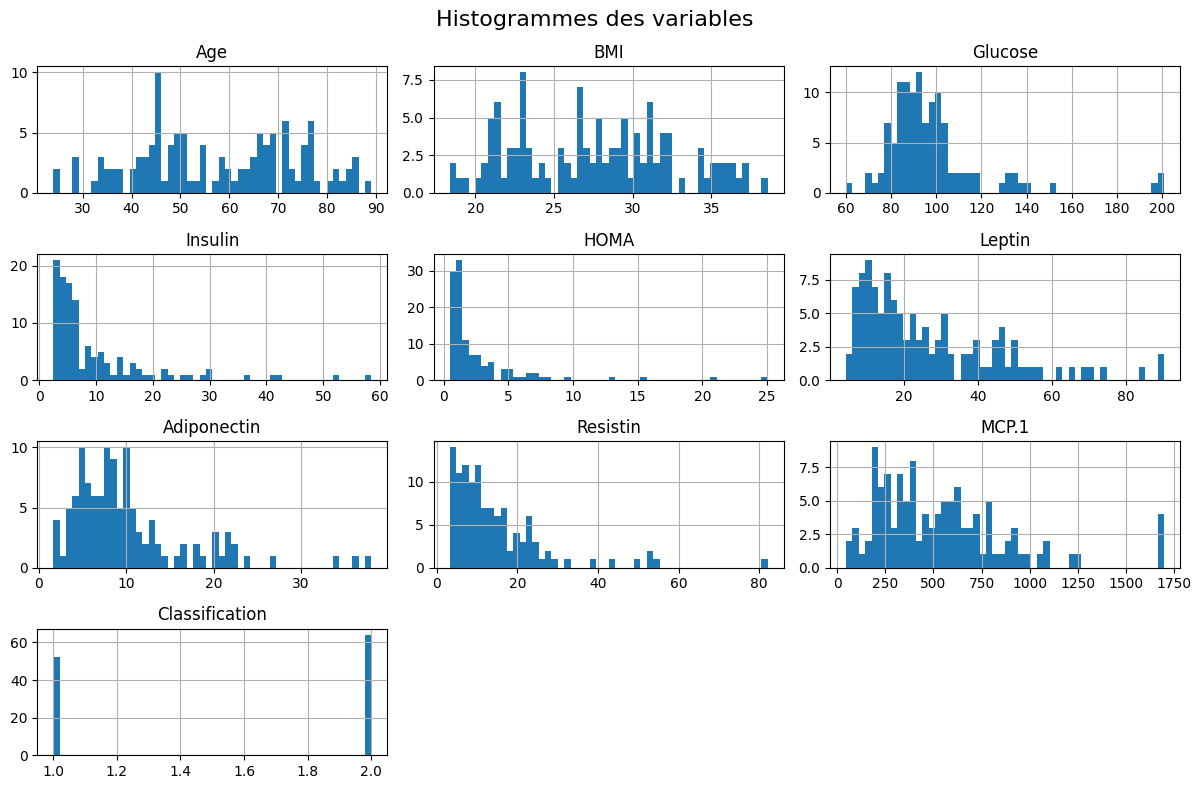

In [1]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
data = pd.read_csv('dataR2.csv')

# Aperçu des données
print(data.shape)
print(data.head())
data.info()

# Liste des variables explicatives
features = data.columns[:-1]
target = 'Classification'

# Histogrammes des variables
data.hist(bins=50, figsize=(12, 8))
plt.suptitle("Histogrammes des variables", fontsize=16)
plt.tight_layout()
plt.show()


## Definition of X and y


In [2]:
X = data.drop(columns='Classification')
y = data['Classification']
Y_binarized = (y == 2).astype(int)

## NAIVE BAYES

### Why do we use a Gaussian NB

In [3]:
from scipy.stats import shapiro

for col in X.columns:
    stat, p = shapiro(X[col])
    if p>0.05:
        print(f"We cannot reject H0: The column {col} follows a normal distribution as p= {p} > 0.05")
    else:
        print(f"We cannot reject H0: The column {col} follows a normal distribution as p= {p} > 0.05")

We cannot reject H0: The column Age follows a normal distribution as p= 0.008932850613695056 > 0.05
We cannot reject H0: The column BMI follows a normal distribution as p= 0.00765341311315994 > 0.05
We cannot reject H0: The column Glucose follows a normal distribution as p= 1.2014716303695527e-12 > 0.05
We cannot reject H0: The column Insulin follows a normal distribution as p= 1.5076048136113956e-14 > 0.05
We cannot reject H0: The column HOMA follows a normal distribution as p= 4.300187278780875e-17 > 0.05
We cannot reject H0: The column Leptin follows a normal distribution as p= 1.1868019935827926e-08 > 0.05
We cannot reject H0: The column Adiponectin follows a normal distribution as p= 2.764933584842159e-10 > 0.05
We cannot reject H0: The column Resistin follows a normal distribution as p= 6.705226955771421e-13 > 0.05
We cannot reject H0: The column MCP.1 follows a normal distribution as p= 5.076835730086118e-08 > 0.05


So we use a Gaussian Naive Bayes method.

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Binarize the dataset: Convert classification values to {0, 1}
Y_binarized = (y == 2).astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_binarized, test_size=0.25, random_state=42)

# Initialize and train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Classification Accuracy: {accuracy:.4f}")

Naive Bayes Classification Accuracy: 0.7586


## Évaluation du modèle et Cross-validation

In [5]:
from sklearn.metrics import f1_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.3f}")

# F1-score (binaire par défaut)
f1 = f1_score(y_test, y_pred)
print(f"F1-score : {f1:.3f}")

# Rapport complet
print("\nClassification Report :")
print(classification_report(y_test, y_pred))


Accuracy : 0.759
F1-score : 0.696

Classification Report :
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.89      0.57      0.70        14

    accuracy                           0.76        29
   macro avg       0.79      0.75      0.75        29
weighted avg       0.79      0.76      0.75        29



In [6]:
from sklearn.model_selection import cross_val_score

# Initialisation du modèle
model = GaussianNB()

# Validation croisée avec scoring F1
f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
acc_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Résumé
print("Validation croisée (5 folds)")
print(f"F1-score moyen     : {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")
print(f"Accuracy moyen     : {acc_scores.mean():.3f} ± {acc_scores.std():.3f}")


Validation croisée (5 folds)
F1-score moyen     : 0.496 ± 0.228
Accuracy moyen     : 0.589 ± 0.153
